In [31]:
import numpy as np
import matplotlib.pyplot as plt
import ast
from scipy.optimize import curve_fit
import math

In [32]:
# # Load the 2D array from the CSV file and the masks
load_data = np.loadtxt("data/normalized_data_RT.csv", delimiter=",")
load_mask = np.loadtxt("data/cleaning_mask_RT.csv", delimiter=",")
voltages = np.loadtxt("data/voltages-RT.csv", delimiter=",")
voltage_mask = np.loadtxt("data/voltage_mask_RT.csv", delimiter=",")
 
# Reshape the 2D array back to its original 3D shape
loaded_data = load_data.reshape(310,2,140)
loaded_mask = load_mask.reshape(310,2,140)

In [33]:
# add the masks to the data
clean_data = np.ma.masked_array(loaded_data, loaded_mask)
print(len(clean_data))

clean_voltages = np.ma.masked_array(voltages, voltage_mask)
print(len(clean_voltages))

310
310


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


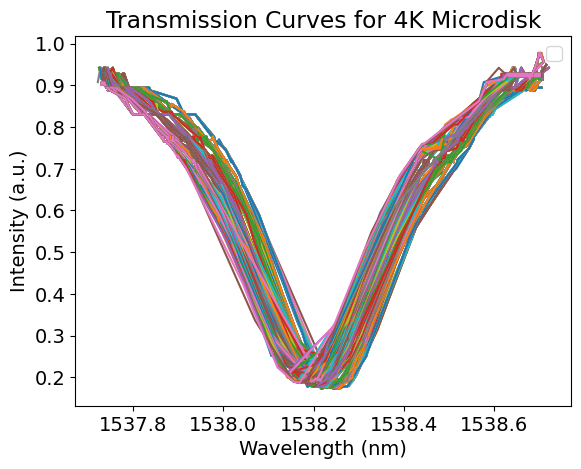

In [34]:
#lets regraph again

for i in range(len(clean_data)):
    plt.plot(clean_data[i][0], clean_data[i][1])  #if needed , label = .3f'$\\alpha = {voltages[i]}$'
plt.legend()
plt.title("Transmission Curves for 4K Microdisk")
plt.xlabel('Wavelength (nm)')
plt.ylabel('Intensity (a.u.)')

plt.show()

In [35]:
random_number = 282 #best for r values
radius = 10e-6
print(np.exp(-(random_number*2*math.pi*radius)/2))

0.9911798366041901


In [7]:
#function for transmission in an all pass ring

#function that seems to work now changing names
def Tsymthru(wavelength, neff,  abscoef_power, r, radius):
    phase=4*math.pi**2*radius*neff/wavelength
    round_trip_loss_field=np.exp(-(abscoef_power*2*math.pi*radius)/2)
    Numer=round_trip_loss_field**2-2*round_trip_loss_field*r*np.cos(phase)+r**2
    Denom=1-2*r*round_trip_loss_field*np.cos(phase)+(r*round_trip_loss_field)**2
    return Numer/Denom

In [8]:
#function with two inputs near 1  --> doesn't work for either
# def Tsymthru(wavelength, neff, round_trip_loss_field, r, radius):
#     phase=4*math.pi**2*radius*neff/wavelength
#     #round_trip_loss_field=np.exp(-(abscoef_power*2*math.pi*radius)/2)
#     Numer=round_trip_loss_field**2-2*round_trip_loss_field*r*np.cos(phase)+r**2
#     Denom=1-2*r*round_trip_loss_field*np.cos(phase)+(r*round_trip_loss_field)**2
#     return Numer/Denom

#original function --> doesn't work for alpha
# def Tsymthru(wavelength, neff, abscoef_power, r, radius):
#     phase=4*math.pi**2*radius*neff/wavelength
#     round_trip_loss_field=np.exp(-(abscoef_power*2*math.pi*radius)/2)
#     Numer=round_trip_loss_field**2-2*round_trip_loss_field*r*np.cos(phase)+r**2
#     Denom=1-2*r*round_trip_loss_field*np.cos(phase)+(r*round_trip_loss_field)**2
#     return Numer/Denom

#function that seems to work for weird names
# def Tsymthru(wavelength, neff, round_trip_loss_field, random_number, radius):
#     phase=4*math.pi**2*radius*neff/wavelength
#     r=np.exp(-(random_number*2*math.pi*radius)/2)
#     Numer=round_trip_loss_field**2-2*round_trip_loss_field*r*np.cos(phase)+r**2
#     Denom=1-2*r*round_trip_loss_field*np.cos(phase)+(r*round_trip_loss_field)**2
#     return Numer/Denom

#function with switched variables --> doesn't work for alpha
# def Tsymthru(wavelength, neff, r, abscoef_power, radius):
#     phase=4*math.pi**2*radius*neff/wavelength
#     round_trip_loss_field=np.exp(-(abscoef_power*2*math.pi*radius)/2)
#     Numer=round_trip_loss_field**2-2*round_trip_loss_field*r*np.cos(phase)+r**2
#     Denom=1-2*r*round_trip_loss_field*np.cos(phase)+(r*round_trip_loss_field)**2
#     return Numer/Denom

In [9]:
print(clean_data[0][0])

[-- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --]


In [10]:
n = 276
def Guess(wavelength,neff, abscoef_power):
    return Tsymthru(wavelength, neff, 0.99635, abscoef_power, 1.75e-6) #1.75 not 10
x = np.ma.masked_array(clean_data[n][0])
y = np.ma.masked_array(clean_data[n][1])


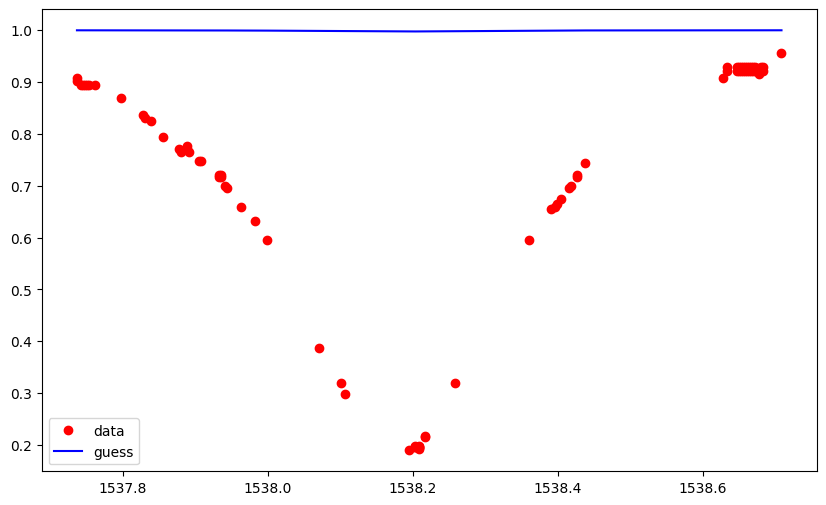

In [11]:
#276 = 2.5180, 723
#2 =
plt.figure(figsize=(10,6)) 
new_x = np.linspace(1537, 1539.5, 49)
ans = Guess(x*1e-9,2.5180304, 0.9913)



plt.plot(x, y, 'ro', label='data')
plt.plot(x, ans, 'b-', label ="guess")
plt.legend()
plt.show()


In [12]:
fit_params_arr=np.zeros([len(y)+1,2])
fit_params_arr[0]=[2.5180304, 0.9915]
for i in range(len(y)):
    fit_params_arr[i],fit_cov_arr=curve_fit(Guess,x[~x.mask]*1e-9, y[~y.mask],p0=fit_params_arr[i])
    fit_params_arr[i+1]=fit_params_arr[i]
fit_params_arr=fit_params_arr[:-1]


In [13]:
fit_ans = Guess(x*1e-9,fit_params_arr[:,0], fit_params_arr[:,1])
print(fit_params_arr)

[[2.51808214 0.99998908]
 [2.51808214 0.99998908]
 [2.51808214 0.99998908]
 [2.51808214 0.99998908]
 [2.51808214 0.99998908]
 [2.51808214 0.99998908]
 [2.51808214 0.99998908]
 [2.51808214 0.99998908]
 [2.51808214 0.99998908]
 [2.51808214 0.99998908]
 [2.51808214 0.99998908]
 [2.51808214 0.99998908]
 [2.51808214 0.99998908]
 [2.51808214 0.99998908]
 [2.51808214 0.99998908]
 [2.51808214 0.99998908]
 [2.51808214 0.99998908]
 [2.51808214 0.99998908]
 [2.51808214 0.99998908]
 [2.51808214 0.99998908]
 [2.51808214 0.99998908]
 [2.51808214 0.99998908]
 [2.51808214 0.99998908]
 [2.51808214 0.99998908]
 [2.51808214 0.99998908]
 [2.51808214 0.99998908]
 [2.51808214 0.99998908]
 [2.51808214 0.99998908]
 [2.51808214 0.99998908]
 [2.51808214 0.99998908]
 [2.51808214 0.99998908]
 [2.51808214 0.99998908]
 [2.51808214 0.99998908]
 [2.51808214 0.99998908]
 [2.51808214 0.99998908]
 [2.51808214 0.99998908]
 [2.51808214 0.99998908]
 [2.51808214 0.99998908]
 [2.51808214 0.99998908]
 [2.51808214 0.99998908]


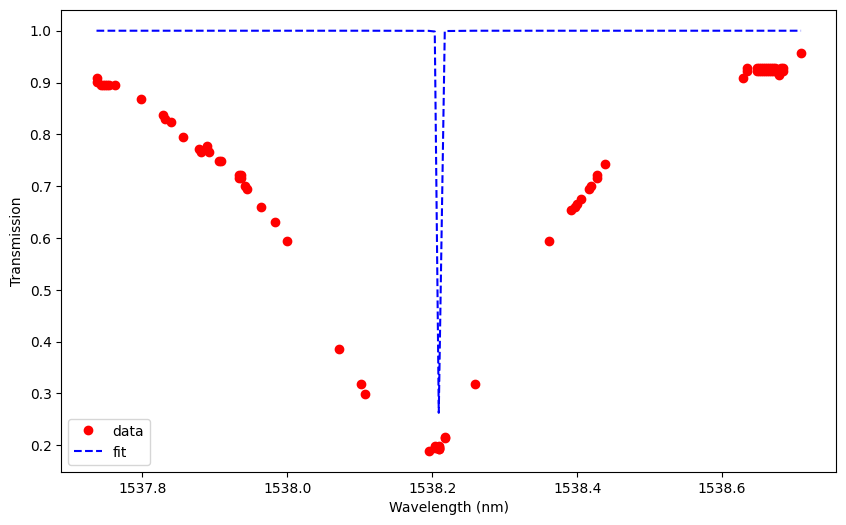

[0.9012363700538996 0.9079554004549932 0.8945670616650416
 0.8945670616650416 0.8945670616650416 0.8945670616650416
 0.8945670616650416 0.8945670616650416 0.8683797299212956
 0.836720954007974 0.8305290710978726 0.8243830092154252 0.79432823472424
 0.7710752692535132 0.7653691760103327 0.7710752692535132
 0.7768239034052127 0.7653691760103327 0.7485030052605208
 0.7485030052605208 0.715877494894233 0.7212146104517922 0.715877494894233
 0.7212146104517922 0.7001019548760514 0.6949210767004056
 0.6597126909323731 0.6309573444801644 0.5945570708544129 0.38645308111558
 0.31858535393065274 0.2979844135750632 0.18941717485013648
 0.19512934226359394 0.19658409933552168 0.19804970212708226
 0.19225204483160976 0.19368535065105721 0.19512934226359394
 0.19658409933552168 0.19804970212708226 0.2149107127572576
 0.21651294682205716 0.31858535393065274 0.5945570708544129
 0.6548307004467827 0.6597126909323731 0.6646310783539732
 0.6745781314354616 0.6949210767004056 0.7001019548760514
 0.7158774

In [14]:
plt.figure(figsize=(10,6))
plt.plot(x, y, 'o', color ='red', label ="data")
plt.plot(x, fit_ans, '--', color ='blue', label ="fit")
#plt.title('Cryogenic Forward Bias Curve')
#plt.ticklabel_format(useOffset=False)
#plt.text(1551.55, 0.2, r'0.8V', color = "red", fontsize="24")
plt.xlabel('Wavelength (nm)')
plt.ylabel('Transmission')

plt.legend()
plt.show()

print(y)

In [15]:
length = len(clean_data)
print(clean_voltages.mask)

[ True False False False False False False False False False False False
 False False False False False False False False False  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True False False False False False False False False
 False False False False False False False False False False False False
  True  True  True  True  True  True  True  True  True  True False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False  True False False False False False False False False
 False  True  True  True  True  True  True  True False False False False
 False False False False False False False False False False False False
 False False False False False False False False  T

In [16]:
#print(y)
print(y[~y.mask])

[0.9012363700538996 0.9079554004549932 0.8945670616650416
 0.8945670616650416 0.8945670616650416 0.8945670616650416
 0.8945670616650416 0.8945670616650416 0.8683797299212956
 0.836720954007974 0.8305290710978726 0.8243830092154252 0.79432823472424
 0.7710752692535132 0.7653691760103327 0.7710752692535132
 0.7768239034052127 0.7653691760103327 0.7485030052605208
 0.7485030052605208 0.715877494894233 0.7212146104517922 0.715877494894233
 0.7212146104517922 0.7001019548760514 0.6949210767004056
 0.6597126909323731 0.6309573444801644 0.5945570708544129 0.38645308111558
 0.31858535393065274 0.2979844135750632 0.18941717485013648
 0.19512934226359394 0.19658409933552168 0.19804970212708226
 0.19225204483160976 0.19368535065105721 0.19512934226359394
 0.19658409933552168 0.19804970212708226 0.2149107127572576
 0.21651294682205716 0.31858535393065274 0.5945570708544129
 0.6548307004467827 0.6597126909323731 0.6646310783539732
 0.6745781314354616 0.6949210767004056 0.7001019548760514
 0.7158774

In [17]:
# so getting there for one
# now I have a general idea of where we're going
# i just need to do it like 260 more times

fits = []
first = 20
last = 140

def Guess(wavelength,neff):
    return Tsymthru(wavelength, neff, 1575, 0.9962, 1.75e-6)

neff = np.zeros((len(clean_voltages)))
neff_guess = 2.51819078

for n in range(0, length):
    
    line = []
    line.append(clean_data[n][0])

    x = np.ma.masked_array(clean_data[n][0])
    y = np.ma.masked_array(clean_data[n][1])


    fit_params_arr=np.zeros([len(y)+1,1])
    #fit_params_arr[0]=[neff[n], alph[n]]
    fit_params_arr[0]=[neff_guess]
    
    if clean_voltages.mask[n] == False:
        print("Guess is ", fit_params_arr[0])
        for i in range(len(y)):
            fit_params_arr[i],fit_cov_arr=curve_fit(Guess,x[~x.mask]*1e-9, y[~y.mask],p0=fit_params_arr[i])
            fit_params_arr[i+1]=fit_params_arr[i]
        fit_params_arr=fit_params_arr[:-1]

        neff_guess = fit_params_arr[12][0]
        neff[n] = neff_guess    #grab a number from near the middle
        #alph.append(fit_params_arr[12][1])
        
        print(fit_params_arr[12])
        #fit_ans = Guess(x*1e-9,fit_params_arr[:,0], fit_params_arr[:,1])
        fit_ans = Guess(x*1e-9,fit_params_arr[:,0])
        trans = fit_ans.tolist()
        line.append(trans)
        print(len(trans))
        fits.append(line)

    #plt.figure(figsize=(10,6))
    #plt.plot(x, y, 'o', color ='red', label = f'{n}')
    #plt.plot(x, fit_ans, '--', color ='blue', label ="fit")
    #plt.xlabel('Wavelength (nm)')
    #plt.ylabel('Transmission')
    #plt.legend()
    #plt.show()
    


Guess is  [2.51819078]


[2.51816579]
140
Guess is  [2.51816579]
[2.51816629]
140
Guess is  [2.51816629]
[2.51816658]
140
Guess is  [2.51816658]
[2.51816662]
140
Guess is  [2.51816662]
[2.51816634]
140
Guess is  [2.51816634]
[2.51816729]
140
Guess is  [2.51816729]
[2.51816523]
140
Guess is  [2.51816523]
[2.51816459]
140
Guess is  [2.51816459]
[2.51816298]
140
Guess is  [2.51816298]
[2.51816582]
140
Guess is  [2.51816582]
[2.51816456]
140
Guess is  [2.51816456]
[2.51816456]
140
Guess is  [2.51816456]
[2.51816456]
140
Guess is  [2.51816456]
[2.51816456]
140
Guess is  [2.51816456]
[2.5181646]
140
Guess is  [2.5181646]
[2.51816487]
140
Guess is  [2.51816487]
[2.51816487]
140
Guess is  [2.51816487]
[2.51816487]
140
Guess is  [2.51816487]
[2.51816487]
140
Guess is  [2.51816487]
[2.51816487]
140
Guess is  [2.51816487]
[2.51814474]
140
Guess is  [2.51814474]
[2.51814474]
140
Guess is  [2.51814474]
[2.51814463]
140
Guess is  [2.51814463]
[2.51814463]
140
Guess is  [2.51814463]
[2.51814519]
140
Guess is  [2.51814519]
[2

In [18]:
print(neff[276])

2.5180264282144273


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


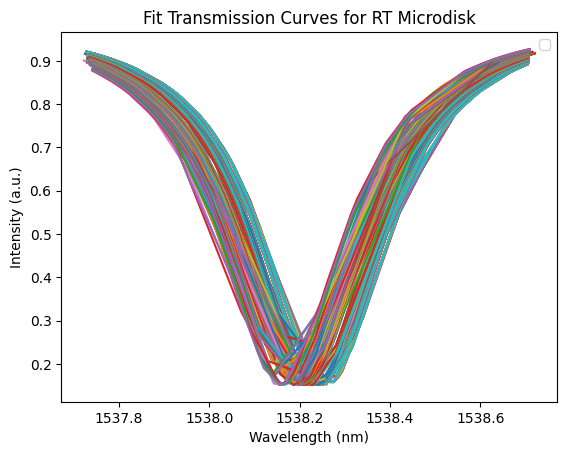

In [19]:
#so this fit looks quite good
# it could use some r variation tho so lets see if we can do that using the neff values as the set point

for i in range(len(fits)):
    plt.plot(fits[i][0], fits[i][1])  #if needed , label = .3f'$\\alpha = {voltages[i]}$'
plt.legend()
plt.title("Fit Transmission Curves for RT Microdisk")
plt.xlabel('Wavelength (nm)')
plt.ylabel('Intensity (a.u.)')
plt.show()


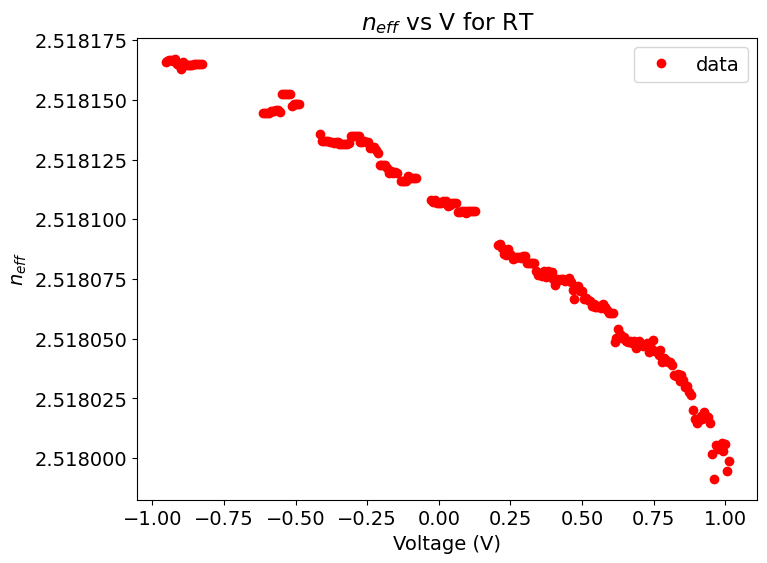

In [20]:
plt.figure(figsize=(8,6))
plt.rcParams.update({'font.size': 14})
plt.plot(clean_voltages  , neff,  'o', color ='red', label ="data")
plt.title('$n_{eff}$ vs V for RT')
#plt.ticklabel_format(useOffset=False)
#plt.text(1551.55, 0.2, r'0.8V', color = "red", fontsize="24")
plt.xlabel('Voltage (V)')
plt.ylabel('$n_{eff}$')
plt.savefig("figures/Gehl-RT-Neff.png",bbox_inches='tight')
plt.legend()
plt.show()

In [21]:
# now lets try again with r

fits_alph = []

j = 0

alph = np.zeros((len(clean_voltages)))
alph_guess = 0.9962

for n in range(0, length):
    
    def Guess(wavelength,alph_guess):
        return Tsymthru(wavelength, neff[n], 1580 , alph_guess,   1.75e-6)

    

    first = 0
    last = 143

    line = []
    line.append(clean_data[n][0][first:last])


    x = np.ma.masked_array(clean_data[n][0][first:last])
    y = np.ma.masked_array(clean_data[n][1][first:last])
    
    fit_params_arr=np.zeros([len(y)+1,1])
    #fit_params_arr[0]=[neff[n], alph[n]]
    fit_params_arr[0]=[alph_guess]
    
    if clean_voltages.mask[n] == False:
        print("Guess is ", fit_params_arr[0])
        for i in range(len(y)):
            fit_params_arr[i],fit_cov_arr=curve_fit(Guess,x[~x.mask]*1e-9, y[~y.mask],p0=fit_params_arr[i])
            fit_params_arr[i+1]=fit_params_arr[i]
        fit_params_arr=fit_params_arr[:-1]

        alph_guess = fit_params_arr[12][0]
        alph[n] = alph_guess    #grab a number from near the middle
        #alph.append(fit_params_arr[12][1])
        
        print(fit_params_arr[12])
        #fit_ans = Guess(x*1e-9,fit_params_arr[:,0], fit_params_arr[:,1])
        fit_ans = Guess(x*1e-9,fit_params_arr[:,0])
        trans = fit_ans.tolist()
        line.append(trans)
        fits_alph.append(line)

    #plt.figure(figsize=(10,6))
    #plt.plot(x, y, 'o', color ='red', label = f'{n}')
    #plt.plot(x, fit_ans, '--', color ='blue', label ="fit")
    #plt.xlabel('Wavelength (nm)')
    #plt.ylabel('Transmission')
    #plt.legend()
    #plt.show()
    


Guess is  [0.9962]
[0.99625679]
Guess is  [0.99625679]
[0.9962721]
Guess is  [0.9962721]
[0.99626558]
Guess is  [0.99626558]


C:\Users\madel\AppData\Local\Temp\ipykernel_42412\4154141555.py:5: RuntimeWarning: divide by zero encountered in divide
  phase=4*math.pi**2*radius*neff/wavelength


[0.99627097]
Guess is  [0.99627097]
[0.99631063]
Guess is  [0.99631063]
[0.99628937]
Guess is  [0.99628937]
[0.99627346]
Guess is  [0.99627346]
[0.99627679]
Guess is  [0.99627679]
[0.99626737]
Guess is  [0.99626737]
[0.99621428]
Guess is  [0.99621428]
[0.99625228]
Guess is  [0.99625228]
[0.99625228]
Guess is  [0.99625228]
[0.99625228]
Guess is  [0.99625228]
[0.99625228]
Guess is  [0.99625228]
[0.99625354]
Guess is  [0.99625354]
[0.99623608]
Guess is  [0.99623608]
[0.99623608]
Guess is  [0.99623608]
[0.99623608]
Guess is  [0.99623608]
[0.99623608]
Guess is  [0.99623608]
[0.99623608]
Guess is  [0.99623608]
[0.99620193]
Guess is  [0.99620193]
[0.99620193]
Guess is  [0.99620193]
[0.99620361]
Guess is  [0.99620361]
[0.99620361]
Guess is  [0.99620361]
[0.99620957]
Guess is  [0.99620957]
[0.99620828]
Guess is  [0.99620828]
[0.99620828]
Guess is  [0.99620828]
[0.99620609]
Guess is  [0.99620609]
[0.99620609]
Guess is  [0.99620609]
[0.9962155]
Guess is  [0.9962155]
[0.99621449]
Guess is  [0.9962

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


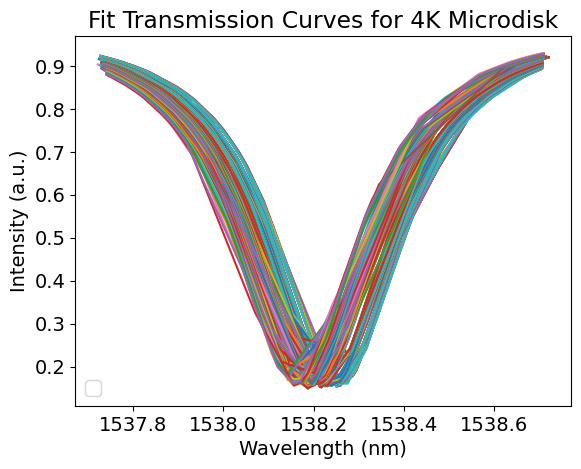

In [22]:

for i in range(len(fits_alph)):
    plt.plot(fits_alph[i][0], fits_alph[i][1])  #if needed , label = .3f'$\\alpha = {voltages[i]}$'
plt.legend()
plt.title("Fit Transmission Curves for 4K Microdisk")
plt.xlabel('Wavelength (nm)')
plt.ylabel('Intensity (a.u.)')
#plt.savefig("Gehl-4K-Curves.png")
plt.show()

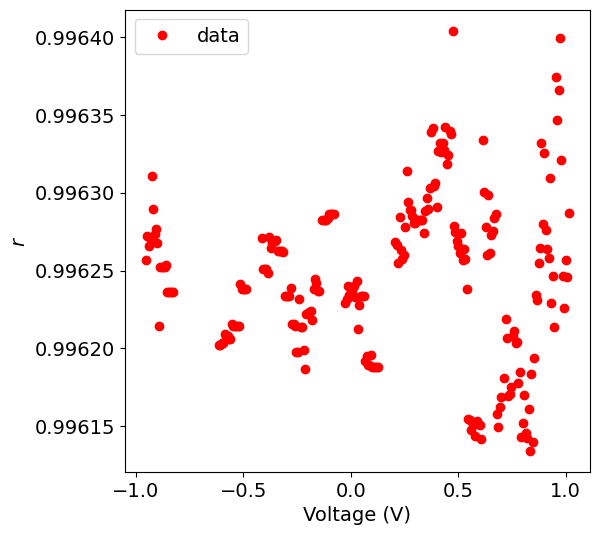

In [23]:
plt.figure(figsize=(6,6))
plt.plot(clean_voltages  , alph,  'o', color ='red', label ="data")
#plt.title('Cryogenic Forward Bias Curve')
#plt.ticklabel_format(useOffset=False)
#plt.text(1551.55, 0.2, r'0.8V', color = "red", fontsize="24")
plt.xlabel('Voltage (V)')
plt.ylabel('$r$')

plt.legend()
plt.show()

In [24]:
# now lets try again with r

fits_r = []

r = np.zeros((len(clean_voltages)))
r_guess =  1562.71931754

for n in range(0, length):
    
    def Guess(wavelength,r):
        return Tsymthru(wavelength, neff[n], r, 0.9962,   1.75e-6)

    line = []
    line.append(clean_data[n][0])

    x = np.ma.masked_array(clean_data[n][0])
    y = np.ma.masked_array(clean_data[n][1])
    
    fit_params_arr=np.zeros([len(y)+1,1])
    #fit_params_arr[0]=[neff[n], r[n]]
    fit_params_arr[0]=[r_guess]
    
    if clean_voltages.mask[n] == False:
        print("Guess is ", fit_params_arr[0])
        for i in range(len(y)):
            fit_params_arr[i],fit_cov_arr=curve_fit(Guess,x[~x.mask]*1e-9, y[~y.mask],p0=fit_params_arr[i]) #, bounds=((720,760)))
            fit_params_arr[i+1]=fit_params_arr[i]
        fit_params_arr=fit_params_arr[:-1]

        r_guess = fit_params_arr[12][0]
        r[n] = r_guess    #grab a number from near the middle
        #r.append(fit_params_arr[12][1])
        
        print(fit_params_arr[12])
        #fit_ans = Guess(x*1e-9,fit_params_arr[:,0], fit_params_arr[:,1])
        fit_ans = Guess(x*1e-9,fit_params_arr[:,0])
        trans = fit_ans.tolist()
        line.append(trans)
        fits_r.append(line)

    #plt.figure(figsize=(10,6))
    #plt.plot(x, y, 'o', color ='red', label = f'{n}')
    #plt.plot(x, fit_ans, '--', color ='blue', label ="fit")
    #plt.xlabel('Wavelength (nm)')
    #plt.ylabel('Transmission')
    #plt.legend()
    #plt.show()
    


Guess is  [1562.71931754]
[1562.71931754]
Guess is  [1562.71931754]
[1560.61959128]
Guess is  [1560.61959128]
[1561.31837342]
Guess is  [1561.31837342]
[1560.04070373]
Guess is  [1560.04070373]


C:\Users\madel\AppData\Local\Temp\ipykernel_42412\4154141555.py:5: RuntimeWarning: divide by zero encountered in divide
  phase=4*math.pi**2*radius*neff/wavelength


[1574.88456845]
Guess is  [1574.88456845]
[1575.64494048]
Guess is  [1575.64494048]
[1574.76745601]
Guess is  [1574.76745601]
[1573.51043533]
Guess is  [1573.51043533]
[1575.18373967]
Guess is  [1575.18373967]
[1572.22272794]
Guess is  [1572.22272794]
[1571.58206204]
Guess is  [1571.58206204]
[1571.58206204]
Guess is  [1571.58206204]
[1571.58206204]
Guess is  [1571.58206204]
[1571.58206204]
Guess is  [1571.58206204]
[1571.32032695]
Guess is  [1571.32032695]
[1580.03332789]
Guess is  [1580.03332789]
[1580.03332789]
Guess is  [1580.03332789]
[1580.03332789]
Guess is  [1580.03332789]
[1580.03332789]
Guess is  [1580.03332789]
[1580.03332789]
Guess is  [1580.03332789]
[1578.44849689]
Guess is  [1578.44849689]
[1578.44849689]
Guess is  [1578.44849689]
[1578.52803924]
Guess is  [1578.52803924]
[1578.52803924]
Guess is  [1578.52803924]
[1579.04625475]
Guess is  [1579.04625475]
[1578.6828716]
Guess is  [1578.6828716]
[1578.6828716]
Guess is  [1578.6828716]
[1578.95186072]
Guess is  [1578.951860

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


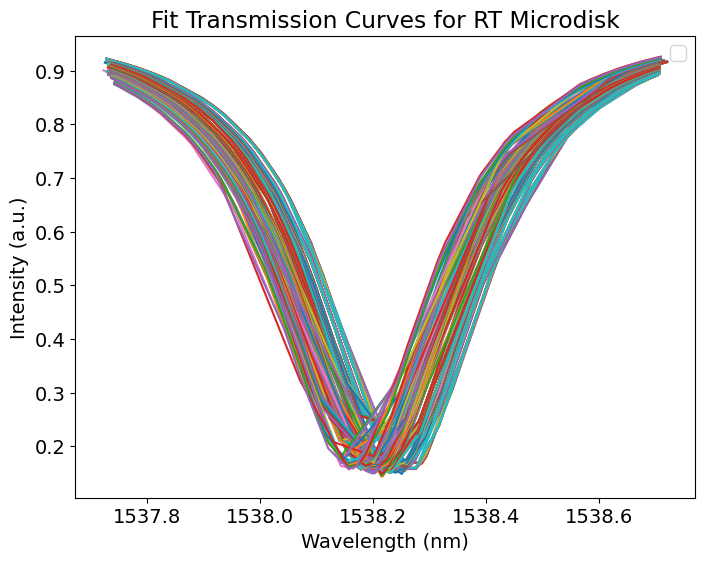

In [25]:
plt.figure(figsize=(8,6))
plt.rcParams.update({'font.size': 14})
for i in range(0,len(fits_r)):
    plt.plot(fits_r[i][0], fits_r[i][1])  #if needed , label = .3f'$\\alpha = {voltages[i]}$'
plt.legend()
plt.title("Fit Transmission Curves for RT Microdisk")
plt.xlabel('Wavelength (nm)')
plt.ylabel('Intensity (a.u.)')
plt.savefig("figures/Gehl-RT-Fit-Curves.png")
plt.show()

In [26]:
plt.figure(figsize=(8,6))
plt.rcParams.update({'font.size': 14})
plt.plot(clean_voltages  , r,  'o', color ='red', label ="data")
#plt.title('Cryogenic Forward Bias Curve')
#plt.ticklabel_format(useOffset=False)
#plt.text(1551.55, 0.2, r'0.8V', color = "red", fontsize="24")
plt.title('$\\alpha$ vs V for RT')
plt.xlabel('Voltage (V)')
plt.ylabel('$\\alpha$')

plt.savefig("figures/Gehl-RT-Alpha.png",bbox_inches='tight')
plt.show()

KeyboardInterrupt: 

In [ ]:
def Linear(x, m, b):
    return m*x + b

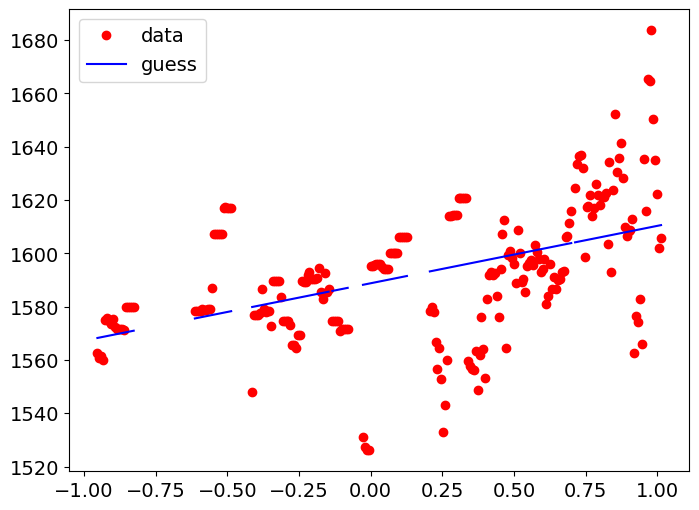

In [ ]:
#276 = 2.5180, 723
#2 =
plt.figure(figsize=(8,6))
plt.rcParams.update({'font.size': 14})
new_x = np.linspace(1537, 1539.5, 49)
ans = Linear(clean_voltages,21.52816689, 1588.76601445)



plt.plot(clean_voltages  , r,  'o', color ='red', label ="data")
plt.plot(clean_voltages, ans, 'b-', label ="guess")
plt.legend()

plt.show()


In [ ]:
alpha_masked = np.ma.array(r)
alpha_masked = np.ma.masked_where(alpha_masked == 0.0, alpha_masked) #masks all values that are 0
print(alpha_masked)


[-- 1562.71931754 1560.619591277822 1561.3183734163351 1560.0407037257155
 1574.884568452459 1575.644940482797 1574.7674560058126 1573.5104353311679
 1575.1837396687058 1572.222727935505 1571.582062043918 1571.582062043918
 1571.582062043918 1571.582062043918 1571.3203269466298 1580.0333278944831
 1580.0333278944831 1580.0333278944831 1580.0333278944831
 1580.0333278944831 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
 -- -- -- -- -- -- -- -- -- -- -- -- -- 1578.4484968946729
 1578.4484968946729 1578.528039235329 1578.528039235329 1579.0462547527138
 1578.682871601737 1578.682871601737 1578.9518607219761 1578.9518607219761
 1586.9385564608292 1607.0621164642248 1607.0621164642248
 1607.0621164642248 1607.0621164642248 1607.0621164642248
 1616.947937364509 1617.3653365294706 1617.0857644668406
 1617.0857644668406 1617.0857644668406 -- -- -- -- -- -- -- -- -- --
 1547.9637215778257 1576.845211972273 1576.845211972273 1576.845211972273
 1577.626783581102 1586.4994575342205 1578.92

In [ ]:
fit_params_arr=np.zeros([len(clean_voltages[~clean_voltages.mask])+1,2])
fit_params_arr[0]=[70, 1600]
for i in range(len(clean_voltages[~clean_voltages.mask])):
    fit_params_arr[i],fit_cov_arr=curve_fit(Linear,clean_voltages[~clean_voltages.mask], alpha_masked[~alpha_masked.mask],p0=fit_params_arr[i])
    fit_params_arr[i+1]=fit_params_arr[i]
fit_params_arr=fit_params_arr[:-1]


In [ ]:
fit_ans = Linear(clean_voltages[~clean_voltages.mask],fit_params_arr[:,0], fit_params_arr[:,1])
print(fit_ans)

[1568.242495347677 1568.386016460299 1568.529537572921 1568.6730586855429
 1568.8165797981649 1568.9601009107869 1569.103622023409 1569.247143136031
 1569.3906642486527 1569.5341853612747 1569.6777064738967
 1569.8212275865187 1569.9647486991405 1570.1082698117625
 1570.2517909243845 1570.3953120370065 1570.5388331496283
 1570.6823542622503 1570.8258753748723 1570.9693964874944
 1575.5620720913969 1575.705593204019 1575.849114316641 1575.992635429263
 1576.1361565418847 1576.2796776545067 1576.4231987671287
 1576.5667198797507 1576.7102409923727 1576.8537621049945
 1576.9972832176165 1577.1408043302386 1577.2843254428606
 1577.4278465554823 1577.5713676681044 1577.7148887807264
 1577.8584098933484 1578.0019310059702 1578.1454521185922
 1578.2889732312142 1579.8677054700556 1580.0112265826776
 1580.1547476952996 1580.2982688079217 1580.4417899205434
 1580.5853110331655 1580.7288321457875 1580.8723532584095
 1581.0158743710315 1581.1593954836533 1581.3029165962753
 1581.4464377088973 158

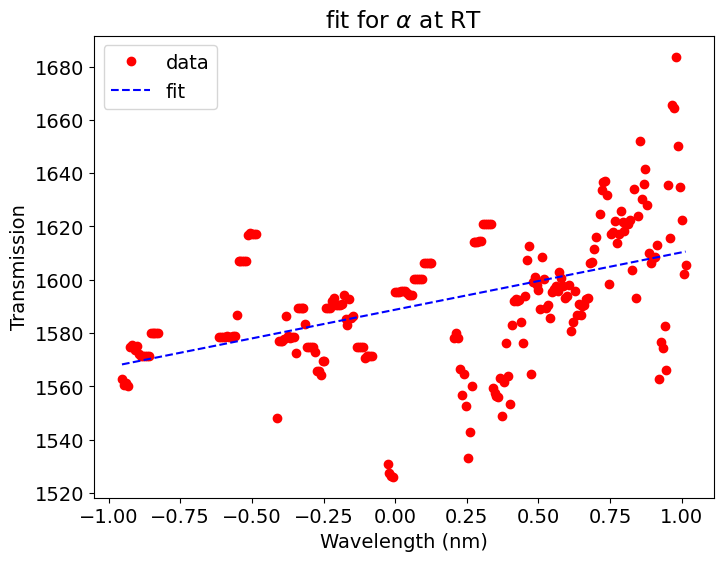

[-- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --]


In [ ]:
plt.figure(figsize=(8,6))
plt.rcParams.update({'font.size': 14})
plt.plot(clean_voltages  , r,  'o', color ='red', label ="data")
plt.plot(clean_voltages[~clean_voltages.mask], fit_ans, '--', color ='blue', label ="fit")
plt.title('fit for $\\alpha$ at RT')
#plt.ticklabel_format(useOffset=False)
#plt.text(1551.55, 0.2, r'0.8V', color = "red", fontsize="24")
plt.xlabel('Wavelength (nm)')
plt.ylabel('Transmission')

plt.legend()
plt.savefig("figures/Gehl-RT-Alpha-Fit.png")
plt.show()

print(y)

In [ ]:
print(fit_ans[0], fit_ans[-1])

fit_alph = np.array([fit_ans[0], fit_ans[-1]])

1568.242495347677 1610.5812235711549


In [ ]:

new_neff = np.delete(neff, np.where(neff == 0))
print(new_neff)

[2.51816579 2.51816629 2.51816658 2.51816662 2.51816634 2.51816729
 2.51816523 2.51816459 2.51816298 2.51816582 2.51816456 2.51816456
 2.51816456 2.51816456 2.5181646  2.51816487 2.51816487 2.51816487
 2.51816487 2.51816487 2.51814474 2.51814474 2.51814463 2.51814463
 2.51814519 2.51814554 2.51814554 2.5181457  2.5181457  2.51814501
 2.51815244 2.51815244 2.51815244 2.51815244 2.51815244 2.51814739
 2.51814848 2.51814823 2.51814823 2.51814823 2.5181359  2.51813274
 2.51813274 2.51813274 2.51813288 2.51813232 2.51813231 2.51813215
 2.51813222 2.51813222 2.51813139 2.51813141 2.51813141 2.51813141
 2.51813141 2.51813204 2.51813513 2.51813513 2.51813513 2.51813513
 2.51813473 2.51813253 2.51813253 2.5181327  2.51813235 2.51813235
 2.51812999 2.51813016 2.51813016 2.51812895 2.51812799 2.51812288
 2.51812288 2.51812288 2.5181228  2.51812153 2.5181196  2.51812041
 2.51811942 2.51811974 2.51811937 2.51811628 2.51811628 2.51811628
 2.51811628 2.51811796 2.51811729 2.51811729 2.51811729 2.5181

In [ ]:
np.savetxt("data/neff-RT.csv", new_neff, delimiter = ",")
np.savetxt("data/alpha-RT.csv", fit_alph, delimiter = ",")